#### CNN 이미지 분류 모델 
- 이미지 데이터셋 준비 
    - torchvision 의 내장 데이터셋 활용 CIFA10
- 이미지 분류 모델
    - 커스텀 CNN 구현


[1] 모듈 로딩 및 데이터 준비 <hr>

In [12]:
## 모듈로딩 
import torch
import torch.nn
from torchvision.datasets import CIFAR10       # torchvision 내장 데이터셋 관련 모듈
from torchvision.transforms import ToTensor    # torchvision 데이터 변환 관련 모듈
from torch.utils.data import DataLoader        # 데이터셋 관련 모듈 로딩

In [4]:
## 데이터로딩
DIR_PATH = '../data/'

## Pytorch의 Dataset 형태 로딩
cifarDS = CIFAR10(DIR_PATH, 
                  train=True, 
                  download=True, 
                  transform=ToTensor())

100.0%


Extracting ../data/cifar-10-python.tar.gz to ../data/


In [5]:
type(cifarDS)

torchvision.datasets.cifar.CIFAR10

In [11]:
# Dataset의 속성 확인
print(f'Classes : {cifarDS.classes}')

print(f'cifarDS.class_to_idx: {cifarDS.class_to_idx}')

# print(f'Classes : {cifarDS}')

print(f'cifarDS.data.shape: {cifarDS.data.shape}')

print(f' len(cifarDS.targets) : {len(cifarDS.targets)}')

Classes : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifarDS.class_to_idx: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
cifarDS.data.shape: (50000, 32, 32, 3)
 len(cifarDS.targets) : 50000


In [10]:
cifarDS.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

[2] 데이터 로더 <hr>
- 학습 시 배치크기만큼 데이터와 라벨/타겟을 로딩

In [13]:
BATCH_SIZE = 50

cifar10DL = DataLoader(cifarDS)

In [14]:
cifar10DL

In [30]:
for data, target in cifar10DL:
    print(target)
    print(data.shape)
    data = data.numpy().squeeze()
    print(data.T.shape)
    print(data)
    break

tensor([6])
torch.Size([1, 3, 32, 32])
(32, 32, 3)
[[[0.23137255 0.16862746 0.19607843 ... 0.61960787 0.59607846 0.5803922 ]
  [0.0627451  0.         0.07058824 ... 0.48235294 0.46666667 0.47843137]
  [0.09803922 0.0627451  0.19215687 ... 0.4627451  0.47058824 0.42745098]
  ...
  [0.8156863  0.7882353  0.7764706  ... 0.627451   0.21960784 0.20784314]
  [0.7058824  0.6784314  0.7294118  ... 0.72156864 0.38039216 0.3254902 ]
  [0.69411767 0.65882355 0.7019608  ... 0.84705883 0.5921569  0.48235294]]

 [[0.24313726 0.18039216 0.1882353  ... 0.5176471  0.49019608 0.4862745 ]
  [0.07843138 0.         0.03137255 ... 0.34509805 0.3254902  0.34117648]
  [0.09411765 0.02745098 0.10588235 ... 0.32941177 0.32941177 0.28627452]
  ...
  [0.6666667  0.6        0.6313726  ... 0.52156866 0.12156863 0.13333334]
  [0.54509807 0.48235294 0.5647059  ... 0.5803922  0.24313726 0.20784314]
  [0.5647059  0.5058824  0.5568628  ... 0.72156864 0.4627451  0.36078432]]

 [[0.24705882 0.1764706  0.16862746 ... 0.423

- cifarDS.data.shape: (50000, 32, 32, 3)
- cifar10D의 data.shape : torch.Size([1, 3, 32, 32]) 
    - channel이 앞으로 옴
    - 이미지를 그리려면 1을 제거, 3(channel)을 뒤로 보내야함

In [31]:
import matplotlib.pyplot as plt

tensor([6])
torch.Size([1, 3, 32, 32])


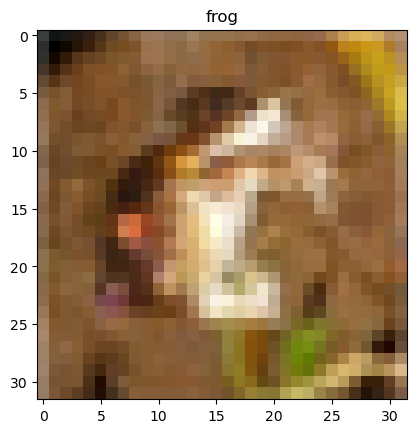

In [33]:
## [테스트] Dataset & DataLoader
for data, target in cifar10DL:
    print(target)
    print(data.shape)
    data1 = data.squeeze()
    plt.imshow(data1.transpose(0,2))
    plt.title(cifarDS.classes[target.item()])

    # print(data.T.shape)
    # print(data)
    break

[3] 커스텀 모델 설계 및 정의 <hr>
- 모델__목적 : 이미지 분류 모델
- 학습__방법 : 지도학습 > 분류 > 다중분류 (10개)
- 클래스이름 : ImageMCF
- 클래스구조 : 특징추출부분 => CNN + 학습부분 FC
- 부모클래스 : nn.Module

In [35]:
import torch.nn as nn
import torch.nn.functional as F

In [51]:
# class ImageMCF(nn.Module):
#     # 모델 구조 설계 즉, 생성자 메서드
#     def __init__(self):
#         # 부모 생성
#         super.__init__()
#         # 모델 층 구성
#         # 특징 추출
#         self.in_layer = nn.Conv2d(3, 10, 3)
#         # in_channels=3, out_channels=10, kernel_size=3
#         self.p_layer = nn.MaxPool2d(2, stride=2)
#         # 학습 관련 층
#         self.hd_layer = nn.Linear(10*15*15,50)
#         self.out_layer = nn.Linear(50,10)


#     # 전방향/순방향 학습 메서드
#     def forward(self, input):
#         output=self.in_layer(input) # nn.Conv2d()
#         print(f'[output 1] {output.shape}')

#         output=F.relu(output)
#         print(f'[output 2] {output.shape}')

#         output=self.p_layer(output) # nn.MaxPool2d()
#         print(f'[output 3] {output.shape}')

#         # 4D -> 2D (샘플수, 피쳐수)
#         output=output.view(output.shape[0], -1)
#         print(f'[output 4] {output.shape}')

#         output=F.relu(self.hd_layer(output))
#         print(f'[output 5] {output.shape}')

#         output=self.out_layer(output)
#         print(f'[output 6] {output.shape}')

#         return output

- [1,3,32,32] ->[1,10,30,30]
- kernal 3 by 3 이 10장
- [batch_size, channel, (32,32)] -> >[batch_size, 10장, (30,30)]

[1,10,30,30] -> [1,10,15,15]

cov2d(3,10,3) =>(color, filter/kernel/mask, )
[50000(장수), 3(채널), 32(height), 32(width)]

In [53]:
# class ImageMCF(nn.Module):
#     # 모델 구조 설계 즉, 생성자 메서드 
#     def __init__(self):
#         # 부모 생성 
#         super().__init__()
#         # 모델 층 구성
#         # 특징 추출 층
#         self.in_layer=nn.Conv2d(3,10,3) # (컬러, 필터/커널/마스크, )
#         self.p_layer=nn.MaxPool2d(2,stride=2)    # kernel 기본 2사용
         
#         # 학습 관련 층
#         self.hd_layer=nn.Linear(10*15*15,50)
#         self.out_layer=nn.Linear(50,10)

    
#     # 전방향/순방향 학습 메서드
#     def forward(self, input):
#         # 이미지 특징맵 추출
#         output=self.in_layer(input)
#         print(f'[output 1 ] {output.shape}')

#         output=F.relu(output)
#         print(f'[output 2] {output.shape}')

#         output=self.p_layer =(output)
#         print(f'[output 1 ] {output.shape}')

#         # 4D -> 2D (샘플 수, 피쳐 수)
#         output=output.view(output.shape[0], -1)
#         print(f'[output4] {output.shape}')

#         output=F.relu(self.hd_layer(output))
#         print(f'[output 5] {output.shape}')
    
#         output=self.out_layer(output)
#         print(f'[output 6] {output.shape}')

#         return output
    

In [ ]:
class ImageMCF(nn.Module):
    # 모델 구조 설계 즉, 생성자 메서드 
    def __init__(self):
        # 부모 생성 
        super().__init__()
        # 모델 층 구성
        # 특징 추출 층
        self.in_layer=nn.Conv2d(3,10,3) # (컬러, 필터/커널/마스크, )
        self.in_layer=nn.Conv2d(10,50,3)
        self.in_layer=nn.Conv2d(50,10,3)
        self.p_layer=nn.MaxPool2d(2,stride=2)    # kernel 기본 2사용
         
        # 학습 관련 층
        self.hd_layer=nn.Linear(10*15*15,50)
        self.out_layer=nn.Linear(50,10)

    
    # 전방향/순방향 학습 메서드
    def forward(self, input):
        # 이미지 특징맵 추출
        output=self.in_layer(input)
        print(f'[output 1 ] {output.shape}')

        output=F.relu(output)
        print(f'[output 2] {output.shape}')

        output=self.p_layer =(output)
        print(f'[output 1 ] {output.shape}')

        # 4D -> 2D (샘플 수, 피쳐 수)
        output=output.view(output.shape[0], -1)
        print(f'[output4] {output.shape}')

        output=F.relu(self.hd_layer(output))
        print(f'[output 5] {output.shape}')
    
        output=self.out_layer(output)
        print(f'[output 6] {output.shape}')

        return output
    

In [60]:
class ImageMCF2(nn.Module):
    # 모델 구조 설계 즉, 생성자 메서드 
    def __init__(self):
        # 부모 생성 
        super().__init__()
        # 모델 층 구성
        # 특징 추출 층
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(3,10,3),
            nn.ReLU(),
            nn.MaxPool2d(2,stride=2)   
        )
        # 학습 관련 층
        self.hd_layer=nn.Linear(10*15*15,50)
        self.out_layer=nn.Linear(50,10)

    
    # 전방향/순방향 학습 메서드
    def forward(self, input):
        # 이미지 특징맵 추출
        output=self.cnn_layer(input)
        print(f'[cnn_layer output] {output.shape}')

        # 4D -> 2D (샘플 수, 피쳐 수)
        output=output.view(output.shape[0], -1)
        print(f'[view output] {output.shape}')

        output=F.relu(self.hd_layer(output))
        print(f'[hd_layer output] {output.shape}')
    
        output=self.out_layer(output)
        print(f'[out_layer output] {output.shape}')

        return output
    

In [65]:
# 모델 인스턴스 생성
m = ImageMCF2()

In [66]:
## 모델 정보 출력 패키지 설치
# %pip install torchinfo

In [67]:
from torchinfo import summary
summary(m)

Layer (type:depth-idx)                   Param #
ImageMCF2                                --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
├─Linear: 1-2                            112,550
├─Linear: 1-3                            510
Total params: 113,340
Trainable params: 113,340
Non-trainable params: 0

In [68]:
## [테스트] Dataset & DataLoader
for data, target in cifar10DL:
    print(f'[target] => {target}')
    print(data.shape)
    # 학습 
    pre=m(data)
    print(f'pre=> {pre.argmax(dim=1)}')
    break

[target] => tensor([6])
torch.Size([1, 3, 32, 32])
[cnn_layer output] torch.Size([1, 10, 15, 15])
[view output] torch.Size([1, 2250])
[hd_layer output] torch.Size([1, 50])
[out_layer output] torch.Size([1, 10])
pre=> tensor([8])


In [59]:
# 모델 파라미터 확인
for name, param in m.named_parameters():
    print(f'[{name}]\n{param.shape}')

[in_layer.weight]
torch.Size([10, 3, 3, 3])
[in_layer.bias]
torch.Size([10])
[hd_layer.weight]
torch.Size([50, 2250])
[hd_layer.bias]
torch.Size([50])
[out_layer.weight]
torch.Size([10, 50])
[out_layer.bias]
torch.Size([10])
